## Data Analysis to filter out files of suitable size

In [93]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
path = '/Users/aizazansari/Desktop/Uni Data/MOMA/decimal_files/'
arr = os.listdir(path)
count = 0
length = 0
lengths = []
counts = []
sizes = open('sizes.txt','w')
for file in arr:
    count = count + 1
    length = 0
    if (count%10==0):
        print(count)
    df = pd.read_csv("decimal_files/"+file,sep='|',error_bad_lines=False, warn_bad_lines=False, engine='python')
    for index, row in df.iterrows():
        length = length + len(row['bytes'].split('-')) + 1
    sizes.write(file+','+str(length)+'\n')
    lengths.append(length)
    counts.append(count)
    
sizes.close()

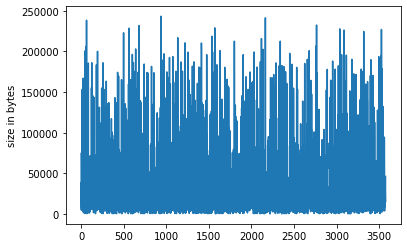

In [50]:
plt.plot(counts,lengths)
plt.ylabel('size in bytes')
plt.show()

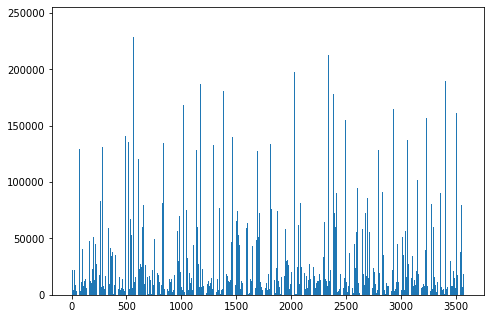

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(counts,lengths)
plt.show()

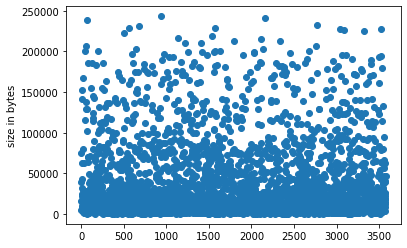

In [52]:
plt.scatter(counts,lengths)
plt.ylabel('size in bytes')
plt.show()

In [84]:
new_lengths = [x for x in lengths if x>5000 and x<15000]
len(new_lengths)

1144

In [78]:
bins = 5*[0]
thresholds = [20000,40000,60000,80000,100000]
for val in lengths:
    if val<thresholds[0]:
        bins[0] = bins[0] + 1
    elif val<thresholds[1]:
        bins[1] = bins[1] + 1
    elif val<thresholds[2]:
        bins[2] = bins[2] + 1
    elif val<thresholds[3]:
        bins[3] = bins[3] + 1
    elif val<thresholds[4]:
        bins[4] = bins[4] + 1

In [79]:
bins

[2089, 561, 246, 207, 129]

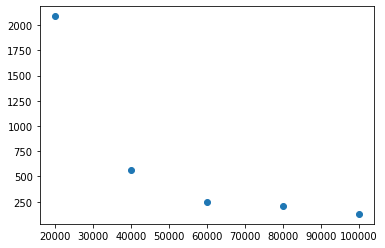

In [80]:
plt.scatter(thresholds,bins)